***
***
***

<br><h1>__Assignment: Case "APPRENTIC CHEF INC"__</h1><br>
MSBA 5 | Machine Learning<br>
Professor: Chase Kusterer<br>
Hult International Business School<br>

Student: Sunlong Ngouv<br>
Date: March 7th, 2020<br><br><br>

***
***
***

## EXPLORATION DATA ANALYSIS

### Importing and imputing Data

In [1]:
# call out libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys 
sys._stdout_ = sys.stdout
import seaborn as sns
import statsmodels.formula.api as smf

# import data set from excel
file = "Apprentice_Chef_Dataset.xlsx"
df = pd.read_excel(file)


In [2]:
# call out data dictionary 
App_description = pd.read_excel("Apprentice_Chef_Data_Dictionary.xlsx")

#App_description

In [3]:
# check null in data frame
df_null = df.isnull().sum()
df_null[df_null>0]

FAMILY_NAME    47
dtype: int64

#### FINDING:

There were 47 customers not giving their family's name when registration their accounts.

In [4]:
# fill NA to the collumn "FAMILY_NAME" and check for existing Null
for col in df:
    
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("NA")

print (f"""
Check for existing null in column "FAMILY_NAME" 
--------------------
{df["FAMILY_NAME"].isnull().sum()}


Check for existing null in "Original DataFrame"
--------------------
{df.isnull().any().sum()}""")


Check for existing null in column "FAMILY_NAME" 
--------------------
0


Check for existing null in "Original DataFrame"
--------------------
0


#### FINDING
1. Missing value has been filled with "NA".
2. There is no missing value any more.

In [5]:
# check status of 47 customers without their family names
df[df['FAMILY_NAME'] == 'NA']

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
40,1890.000,1,Barth (brewer),barth.(brewer)@nike.com,Barth,NA,120,6,10,4,...,5,0,0,70,122.8,3,1,3,14,0
53,2012.500,1,Bethany (Blushing Bethany),bethany.(blushing.bethany)@mmm.com,Bethany,NA,67,1,4,8,...,2,0,0,80,130.4,2,1,2,16,0
97,1725.000,1,Dalla (Dragonstone),dalla.(dragonstone)@protonmail.com,Dalla,NA,64,6,6,3,...,1,1,1,90,147.1,4,0,3,15,894
312,1740.000,1,Erryk (guard),erryk.(guard)@nike.com,Erryk,NA,49,2,8,10,...,3,1,0,70,128.4,3,0,3,13,0
315,1890.000,1,Eustace (Braavos),eustace.(braavos)@yahoo.com,Eustace,NA,129,6,7,1,...,3,1,0,80,184.5,6,1,3,13,0
316,4575.000,1,Eustace (Dance of the Dragons),eustace.(dance.of.the.dragons)@visa.com,Eustace,NA,188,7,8,10,...,2,0,0,80,181.6,5,1,4,10,378
559,1755.000,1,Hareth (Mole's Town),hareth.(mole's.town)@gmail.com,Hareth,NA,71,6,7,10,...,4,1,0,50,124.2,4,1,3,15,320
611,825.000,1,Lem (Standfast),lem.(standfast)@yahoo.com,Lem,NA,12,9,12,9,...,6,1,0,40,115.2,4,0,1,16,58
638,1350.000,1,Maerie (Goodwife),maerie.(goodwife)@walmart.com,Maerie,NA,65,6,5,3,...,1,0,0,40,165.6,6,0,2,16,0
640,5945.625,1,Mallor (Knight),mallor.(knight)@protonmail.com,Mallor,NA,83,1,8,7,...,0,0,0,60,151.8,4,1,3,15,472


#### Finding

1. Customers without a family names are professional and personal categories, grouped by emails they used.
2. The reasons of no having family name is they added their full name in the first-name column already.


In [6]:
# check types of each variables
df_fillna = df
df_fillna.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REVENUE                       1946 non-null   float64
 1   CROSS_SELL_SUCCESS            1946 non-null   int64  
 2   NAME                          1946 non-null   object 
 3   EMAIL                         1946 non-null   object 
 4   FIRST_NAME                    1946 non-null   object 
 5   FAMILY_NAME                   1946 non-null   object 
 6   TOTAL_MEALS_ORDERED           1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH            1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE   1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED     1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT       1946 non-null   float64
 11  MOBILE_NUMBER                 1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON     1946 non-null   int64  
 13  CAN

#### FINDING

1. There are float64(3), int64(22), object(4).
2. We classified data types into 2: Categorical and Numeric Data.

### Outlier Analysis -  Categorical Data

In [7]:
# convert categorical variables to string
cate_df = df_fillna[['NAME', 'EMAIL', 'FIRST_NAME','FAMILY_NAME']].astype(str)
#cate_df

In [8]:
# count subcategory in each variable
name = cate_df['NAME'].value_counts()
email = cate_df['EMAIL'].value_counts()
first_name = cate_df['FIRST_NAME'].value_counts()
family_name = cate_df['FAMILY_NAME'].value_counts()

In [9]:
# print out subcategories with counted numbers
print(f"""
NAME
------
{name}


EMAIL
----------
{email}


FIRST_NAME
----------
{first_name}


FAMILY_NAME
-------------
{family_name}
""")




NAME
------
Nail               1
Bannen             1
Draqaz             1
Tarle              1
Symon Hollard      1
                  ..
Hazrak zo Loraq    1
Quickfinger        1
Dermot             1
Jared Frey         1
Richard Horpe      1
Name: NAME, Length: 1946, dtype: int64


EMAIL
----------
valaena.velaryon@gmail.com       1
halder@apple.com                 1
rohanne.webber@yahoo.com         1
shirei.frey@disney.com           1
tristifer.v.mudd@yahoo.com       1
                                ..
harrold.osgrey@gmail.com         1
davos.seaworth@hotmail.com       1
gladden.wylde@yahoo.com          1
helman.tallhart@passport.com     1
rhea.florent@unitedhealth.com    1
Name: EMAIL, Length: 1946, dtype: int64


FIRST_NAME
----------
Jon       21
Jeyne     14
Aegon     12
Walder    10
Alyn      10
          ..
Sigfry     1
Mance      1
Damion     1
Norne      1
Janos      1
Name: FIRST_NAME, Length: 1442, dtype: int64


FAMILY_NAME
-------------
Frey         79
NA           47
S

In [10]:
# call out popular family names among the customers
family_name[family_name>25]

Frey         79
NA           47
Stark        32
Lannister    29
Tyrell       28
Name: FAMILY_NAME, dtype: int64

#### FINDING

__FAMILY_NAME (COUNTS)__<br>
Frey         (79)<br>
NA           (47)<br>
Stark        (32)<br>
Lannister    (29)<br>
Tyrell       (28)<br>

*Based on Google:*<br>
    Frey - original from Germany for middle and high class people.<br>
    Stark - original from England.<br>
    Lannister - original from England and France.<br>
    
_Business Insight:_ Targeting customer groups from Germany, England and France with special promotions.<br>

In [11]:
# find outliers in main 'Frey'

Frey = cate_df[cate_df["FAMILY_NAME"]=="Frey"]
Frey.sort_values(by=["NAME"], inplace=True)

Frey.head(n=60)

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,NAME,EMAIL,FIRST_NAME,FAMILY_NAME
1323,Addam Frey,addam.frey@gmail.com,Addam,Frey
404,Aenys Frey,aenys.frey@pg.com,Aenys,Frey
407,Alesander Frey,alesander.frey@hotmail.com,Alesander,Frey
21,Alyn Frey,alyn.frey@msn.com,Alyn,Frey
208,Alys Frey,alys.frey@unitedhealth.com,Alys,Frey
1455,Alyx Frey,alyx.frey@aol.com,Alyx,Frey
1348,Amerei Frey,amerei.frey@yahoo.com,Amerei,Frey
218,Androw Frey,androw.frey@protonmail.com,Androw,Frey
428,Arwood Frey,arwood.frey@dupont.com,Arwood,Frey
1357,Arwyn Frey,arwyn.frey@yahoo.com,Arwyn,Frey


#### FINDING

1. There may be at least two customers in 'Frey' group creating fake counts to gain promotions benefits from our company <br> 
Example: Person 1: Alyn,Alys,Alyx and person 2: Sarra, Serra<br><br>
21	Alyn Frey	alyn.frey@msn.com	Alyn	Frey<br>
208	Alys Frey	alys.frey@unitedhealth.com	Alys	Frey<br>
1455	Alyx Frey	alyx.frey@aol.com	Alyx	Frey<br><br>
1228	Sarra Frey	sarra.frey@chevron.com	Sarra	Frey<br>
1933	Serra Frey	serra.frey@msn.com	Serra	Frey<br>

## FEATURE TREATMENT AND ENGINEERING

In [12]:
"""

# plot histograms to see distribution and outliers of categorical variables

fig,ax = plt.subplots(figsize =(15,10))

i_range = range(0,4)
hist_cate_df = [name,name, email, first_name, family_name]
color_list = ['','g','b','y','r']
name_list = ['','NAME','EMAIL','FIRST_NAME','FAMILY_NAME']

for i in i_range:
        
        plt.subplot(2,2,i+1)
        hist_cate_df[i+1].hist(bins = 50,color = color_list[i+1])
        plt.xlabel(name_list[i+1])
        plt.xlim(0.30)
        plt.tight_layout()
#plt.savefig('Housing Data Histograms 5 of 5.png')
#plt.show()

"""

"\n\n# plot histograms to see distribution and outliers of categorical variables\n\nfig,ax = plt.subplots(figsize =(15,10))\n\ni_range = range(0,4)\nhist_cate_df = [name,name, email, first_name, family_name]\ncolor_list = ['','g','b','y','r']\nname_list = ['','NAME','EMAIL','FIRST_NAME','FAMILY_NAME']\n\nfor i in i_range:\n        \n        plt.subplot(2,2,i+1)\n        hist_cate_df[i+1].hist(bins = 50,color = color_list[i+1])\n        plt.xlabel(name_list[i+1])\n        plt.xlim(0.30)\n        plt.tight_layout()\n#plt.savefig('Housing Data Histograms 5 of 5.png')\n#plt.show()\n\n"

#### FINDING
1. NAME and EMAIL are concentrated in 1, there is no outliers.<br>
2. FIRST_NAME and FAMILY_NAME have some outliers to be investigated.<br>

In [13]:
"""
# plot in scatterplot
fig, ax = plt.subplots(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df_fillna['NAME'],
                y = df_fillna['REVENUE'],
                color = 'g')
plt.xlabel('NAME')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df_fillna['EMAIL'],
                y = df_fillna['REVENUE'],
                color = 'y')
plt.xlabel('EMAIL')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = df_fillna['FIRST_NAME'],
                y = df_fillna['REVENUE'],
                color = 'orange')
plt.xlabel('FIRST_NAME')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = df_fillna['FAMILY_NAME'],
                y = df_fillna['REVENUE'],
                color = 'r')
plt.xlabel('FAMILY_NAME')
plt.tight_layout()
plt.savefig('Housing Data Scatterplots 1 of 5.png')
#plt.show()

"""

"\n# plot in scatterplot\nfig, ax = plt.subplots(figsize = (15, 10))\nplt.subplot(2, 2, 1)\nsns.scatterplot(x = df_fillna['NAME'],\n                y = df_fillna['REVENUE'],\n                color = 'g')\nplt.xlabel('NAME')\n\n########################\n\nplt.subplot(2, 2, 2)\nsns.scatterplot(x = df_fillna['EMAIL'],\n                y = df_fillna['REVENUE'],\n                color = 'y')\nplt.xlabel('EMAIL')\n\n########################\n\nplt.subplot(2, 2, 3)\nsns.scatterplot(x = df_fillna['FIRST_NAME'],\n                y = df_fillna['REVENUE'],\n                color = 'orange')\nplt.xlabel('FIRST_NAME')\n\n########################\nplt.subplot(2, 2, 4)\nsns.scatterplot(x = df_fillna['FAMILY_NAME'],\n                y = df_fillna['REVENUE'],\n                color = 'r')\nplt.xlabel('FAMILY_NAME')\nplt.tight_layout()\nplt.savefig('Housing Data Scatterplots 1 of 5.png')\n#plt.show()\n\n"

#### FINDING
Revenue can be grouped into 3: below 2000, between 2001 to 5000, and above 5000.<br>

In [14]:
# create new DateFrame by copy from 'df_fillna'
df_dumm = df_fillna.copy()

In [15]:
# split all email column

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df_dumm.iterrows():
    
    # splitting email domain at '@'
    split_email = df_dumm.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [16]:
# concatenate with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with chef DataFrame
df_dumm = pd.concat([df_dumm, email_df['email_domain']],
                     axis = 1)

In [17]:
# email domain types
personal_email  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email      = ['@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']
prof_email      = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df_dumm['email_domain']:
    
    if '@' + str(domain) in personal_email:
        placeholder_lst.append('personal')
        

    elif '@' + str(domain) in junk_email:
        placeholder_lst.append('junk')
        
        
    elif '@' + str(domain) in prof_email:
        placeholder_lst.append('professional')


    else:
        print('Unknown')


# concatenating with original DataFrame
df_dumm['domain_group'] = pd.Series(placeholder_lst)


# checking results
df_dumm['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

#### FINDING

**Email Type (Counts)**<br>
personal        (861)<br>
professional    (696)<br>
junk            (389)<br>

*Business Insights:* There are high junk-type emails should be investigated to innitiate an strategy.

In [18]:
# get dummies for domain group

dummies = pd.get_dummies(df_dumm['domain_group'])

# concatenating personal_email_domain with Original DataFrame
df_dumm = pd.concat([df_dumm, dummies],
                     axis = 1)


# converting the dummies to int64
df_dumm['junk'] = np.int64(df_dumm['junk'])
df_dumm['personal'] = np.int64(df_dumm['personal'])
df_dumm['professional'] = np.int64(df_dumm['professional'])

df_dumm.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,email_domain,domain_group,junk,personal,professional
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,6,1,3,11,0,passport.com,junk,1,0,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,3,13,90,jnj.com,professional,0,0,1
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,3,0,3,12,0,gmail.com,personal,0,1,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,3,0,3,13,0,ibm.com,professional,0,0,1
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,3,1,3,13,253,goldmansacs.com,professional,0,0,1


In [19]:
# lsit down the four popular family-name customers
top_fam_name = ['Frey','Stark','Lannister','Tyrell ']

for col in df_fillna:
    if col in top_fam_name:
       df_dumm[col]

df_dumm['top_fam_name'] = df_dumm[col]
#df_dumm

In [20]:
# one-hot approach to encode categorical variables
one_hot_fam_name      = pd.get_dummies(df_dumm['top_fam_name'])

# joining codings together
df_dumm = df_dumm.join([one_hot_fam_name])

# saving new columns
new_columns = df_dumm.columns

## Outlier Analysis -  Numerical Data

In [21]:
# Create new DataFrame by dropping four categorical variables
num_df = df_dumm.drop(['NAME', 'EMAIL', 'FIRST_NAME','FAMILY_NAME', 'email_domain','domain_group'], axis=1)

In [22]:
# scope DataFrame to only 32 neccessary variables
num_df = num_df.iloc[:,:32]

In [23]:
# check descriptive statistics
num_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,professional,top_fam_name,0,1,3
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,...,2.79,13.51,106.43,0.2,0.44,0.36,106.43,0.59,0.00,0.00
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,...,0.76,2.33,181.01,0.4,0.50,0.48,181.01,0.49,0.03,0.02
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,...,1.00,5.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,...,2.00,12.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,...,3.00,13.00,0.00,0.0,0.00,0.00,0.00,1.00,0.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,...,3.00,15.00,174.00,0.0,1.00,1.00,174.00,1.00,0.00,0.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,...,5.00,19.00,1600.00,1.0,1.00,1.00,1600.00,1.00,1.00,1.00


Finding:
    Variables are related to their types

In [24]:
# set quantile to see distribution
num_quant1 = num_df.loc[:,:].quantile([0.2,
                             0.4,
                             0.6,
                             0.8,
                             1.0
                            ])
num_quant1

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,professional,top_fam_name,0,1,3
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,...,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,...,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,...,3.0,14.0,28.0,0.0,1.0,0.0,28.0,1.0,0.0,0.0
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,...,3.0,16.0,210.0,0.0,1.0,1.0,210.0,1.0,0.0,0.0
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,...,5.0,19.0,1600.0,1.0,1.0,1.0,1600.0,1.0,1.0,1.0


Finding:
    Revenue: from 0.8 to 1.0, there were high trend

In [25]:
# scope quantile from 0.95 to 100
num_quant2 = num_df.loc[:,:].quantile([0.90,
                             0.93,
                             0.95,
                             0.98,
                             1.0
                            ])
num_quant2

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,junk,personal,professional,top_fam_name,0,1,3
0.90,3697.75,1.0,142.00,8.0,11.0,10.0,146.3950,1.0,3.0,1.0,...,4.0,17.0,336.0,1.0,1.0,1.0,336.0,1.0,0.0,0.0
0.93,4077.60,1.0,164.85,9.0,11.0,10.0,160.6680,1.0,4.0,1.0,...,4.0,17.0,411.7,1.0,1.0,1.0,411.7,1.0,0.0,0.0
0.95,4500.00,1.0,186.75,9.0,11.0,10.0,179.6825,1.0,4.0,1.0,...,4.0,17.0,471.5,1.0,1.0,1.0,471.5,1.0,0.0,0.0
0.98,5175.60,1.0,241.00,9.0,12.0,10.0,222.9150,1.0,6.0,2.0,...,4.0,18.0,657.3,1.0,1.0,1.0,657.3,1.0,0.0,0.0
1.00,8793.75,1.0,493.00,19.0,18.0,10.0,1645.6000,1.0,13.0,3.0,...,5.0,19.0,1600.0,1.0,1.0,1.0,1600.0,1.0,1.0,1.0


In [26]:
# analyzing the three revenue groups: below 2000, between 2001 to 5000, and above 5000.
re_low = num_df[(num_df['REVENUE']<2000)].shape
re_mid = num_df[(num_df['REVENUE']>2000) & (num_df['REVENUE']<5000)].shape
re_hi = num_df[(num_df['REVENUE']>5000) ].shape

print(f"""SIZES IN EACH REVENUE GROUPS:
Below 2000
{re_low}
================
Between 2001 to 5000
{re_mid}
================
Above 5000
{re_hi}""")

SIZES IN EACH REVENUE GROUPS:
Below 2000
(1229, 32)
Between 2001 to 5000
(655, 32)
Above 5000
(49, 32)


#### FINDING
1. Total customer amount is 1,933.<br>
2. 63% of the total customers spent less than 2000.<br>
3. 34% of the total customers spent Between 2001 to 5000.<br>
4. 3% of the total customers spent more than 5000.<br>

*Business Insights*: We should allocate new products for lower expense group to try to increase their expenses, and new drink menu for middle expense group to boost their expenses.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E6975EF08>,
      dtype=object)

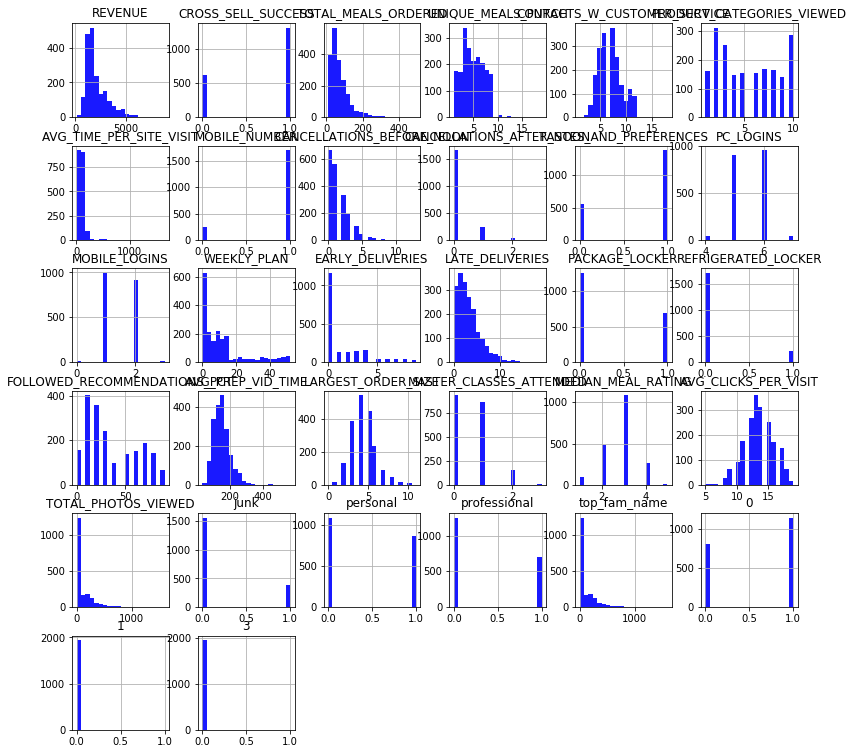

In [27]:
# plot all attributes with grouped histograms
num_df.iloc[:,:32].hist(bins = 20, 
                  grid = True,
                  color = 'b',
                  figsize = (13,13),
                  alpha = 0.9)
#plt.savefig('All histogram.png')


In [28]:
# select the best features with high scores
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


data = num_df
X = num_df.drop('REVENUE',axis=1).astype(int)
y = num_df['REVENUE'].astype(int)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                           Specs          Score
23           TOTAL_PHOTOS_VIEWED  400499.400935
27                  top_fam_name  400499.400935
1            TOTAL_MEALS_ORDERED   61549.737582
5        AVG_TIME_PER_SITE_VISIT   31657.584381
18             AVG_PREP_VID_TIME   23090.024206
17  FOLLOWED_RECOMMENDATIONS_PCT   16881.411538
12                   WEEKLY_PLAN   15099.339512
13              EARLY_DELIVERIES    2984.621310
14               LATE_DELIVERIES    2199.642714
4      PRODUCT_CATEGORIES_VIEWED    1493.964963


#### FINDING

Feature test score produced low R-squared in OLS regression with 56%, so it was rejected.

In [29]:
# find features with high f-score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(X,Selector_f.scores_):
 print (f"""F-score:  // for feature:
 {s}  //  {n} """)

F-score:  // for feature:
 0.040094362358607305  //  CROSS_SELL_SUCCESS 
F-score:  // for feature:
 1096.387653174694  //  TOTAL_MEALS_ORDERED 
F-score:  // for feature:
 7.687195468776677  //  UNIQUE_MEALS_PURCH 
F-score:  // for feature:
 20.29835844738108  //  CONTACTS_W_CUSTOMER_SERVICE 
F-score:  // for feature:
 2.315615604045563  //  PRODUCT_CATEGORIES_VIEWED 
F-score:  // for feature:
 41.51877202205721  //  AVG_TIME_PER_SITE_VISIT 
F-score:  // for feature:
 1.8997976911221794  //  MOBILE_NUMBER 
F-score:  // for feature:
 0.36100805732325425  //  CANCELLATIONS_BEFORE_NOON 
F-score:  // for feature:
 2.5358654007185275  //  CANCELLATIONS_AFTER_NOON 
F-score:  // for feature:
 0.11959444633411065  //  TASTES_AND_PREFERENCES 
F-score:  // for feature:
 0.505160923666359  //  PC_LOGINS 
F-score:  // for feature:
 0.7150801603105386  //  MOBILE_LOGINS 
F-score:  // for feature:
 0.18638692493763448  //  WEEKLY_PLAN 
F-score:  // for feature:
 0.0016850324719406866  //  EARLY_DELIV

#### FINDING

F-test produced low R-squared in OLS regression with 43%, so it was rejected.

In [30]:
"""

# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['CROSS_SELL_SUCCESS'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['TOTAL_MEALS_ORDERED'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['UNIQUE_MEALS_PURCH'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['PRODUCT_CATEGORIES_VIEWED'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['AVG_TIME_PER_SITE_VISIT'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['MOBILE_NUMBER'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['CANCELLATIONS_BEFORE_NOON'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['CANCELLATIONS_AFTER_NOON'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['TASTES_AND_PREFERENCES'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['MOBILE_LOGINS'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['PC_LOGINS'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['WEEKLY_PLAN'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['EARLY_DELIVERIES'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['LATE_DELIVERIES'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['PACKAGE_LOCKER'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['REFRIGERATED_LOCKER'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['AVG_PREP_VID_TIME'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['LARGEST_ORDER_SIZE'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['MASTER_CLASSES_ATTENDED'],
                y = num_df['REVENUE'],
                color = 'y')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['MEDIAN_MEAL_RATING'],
                y = num_df['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['AVG_CLICKS_PER_VISIT'],
                y = num_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['TOTAL_PHOTOS_VIEWED'],
                y = num_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

"""

"\n\n# Visual EDA (Scatterplots)\n########################\n\nfig, ax = plt.subplots(figsize = (10, 8))\nplt.subplot(2, 2, 1)\nsns.scatterplot(x = num_df['CROSS_SELL_SUCCESS'],\n                y = num_df['REVENUE'],\n                color = 'g')\nplt.xlabel('CROSS_SELL_SUCCESS')\n\n########################\n\nplt.subplot(2, 2, 2)\nsns.scatterplot(x = num_df['TOTAL_MEALS_ORDERED'],\n                y = num_df['REVENUE'],\n                color = 'y')\nplt.xlabel('TOTAL_MEALS_ORDERED')\n\n########################\n\nplt.subplot(2, 2, 3)\nsns.scatterplot(x = num_df['UNIQUE_MEALS_PURCH'],\n                y = num_df['REVENUE'],\n                color = 'orange')\nplt.xlabel('UNIQUE_MEALS_PURCH')\n\n########################\nplt.subplot(2, 2, 4)\nsns.scatterplot(x = num_df['CONTACTS_W_CUSTOMER_SERVICE'],\n                y = num_df['REVENUE'],\n                color = 'r')\nplt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')\nplt.tight_layout()\nplt.show()\n\n########################\n##############

In [31]:
#Feature Engineering (outlier thresholds) 

# setting outlier thresholds - data
TOTAL_MEALS_ORDERED_hi           = 275
UNIQUE_MEALS_PURCH_hi            = 9
CONTACTS_W_CUSTOMER_SERVICE_lo   = 2
CONTACTS_W_CUSTOMER_SERVICE_hi   = 10
AVG_TIME_PER_SITE_VISIT_hi       = 250
CANCELLATIONS_BEFORE_NOON_hi     = 7
CANCELLATIONS_AFTER_NOON_hi      = 1.3
MOBILE_LOGINS_hi                 = 3
MOBILE_LOGINS_lo                 = 0.5
PC_LOGINS_hi                     = 7
PC_LOGINS_lo                     = 4
WEEKLY_PLAN_hi                   = 19
EARLY_DELIVERIES_hi              = 4.5
LATE_DELIVERIES_hi               = 10
AVG_PREP_VID_TIME_hi             = 300
LARGEST_ORDER_SIZE_hi            = 9
MASTER_CLASSES_ATTENDED_hi       = 2
MEDIAN_MEAL_RATING_hi            = 4 
AVG_CLICKS_PER_VISIT_lo          = 7.5
AVG_CLICKS_PER_VISIT_hi          = 13
TOTAL_PHOTOS_VIEWED_hi           = 450

# setting outlier thresholds - target
REVENUE_hi                       = 5000


# TOTAL_MEALS_ORDERED
num_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = num_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][num_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
num_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# UNIQUE_MEALS_PURCH
num_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = num_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][num_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
num_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
num_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = num_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][num_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = num_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][num_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

num_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
num_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = num_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][num_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]
num_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
num_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = num_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][num_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

num_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
num_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = num_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][num_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

num_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
num_df['out_MOBILE_LOGINS'] = 0
condition_hi = num_df.loc[0:,'out_MOBILE_LOGINS'][num_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = num_df.loc[0:,'out_MOBILE_LOGINS'][num_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

num_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
num_df['out_PC_LOGINS'] = 0
condition_hi = num_df.loc[0:,'out_PC_LOGINS'][num_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = num_df.loc[0:,'out_PC_LOGINS'][num_df['PC_LOGINS'] < PC_LOGINS_lo]

num_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
num_df['out_WEEKLY_PLAN'] = 0
condition_hi = num_df.loc[0:,'out_WEEKLY_PLAN'][num_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

num_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# EARLY_DELIVERIES
num_df['out_EARLY_DELIVERIES'] = 0
condition_hi = num_df.loc[0:,'out_EARLY_DELIVERIES'][num_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

num_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
num_df['out_LATE_DELIVERIES'] = 0
condition_hi = num_df.loc[0:,'out_LATE_DELIVERIES'][num_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

num_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_PREP_VID_TIME
num_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = num_df.loc[0:,'out_AVG_PREP_VID_TIME'][num_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

num_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LARGEST_ORDER_SIZE
num_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = num_df.loc[0:,'out_LARGEST_ORDER_SIZE'][num_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

num_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MASTER_CLASSES_ATTENDED
num_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = num_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][num_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

num_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MEDIAN_MEAL_RATING
num_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = num_df.loc[0:,'out_MEDIAN_MEAL_RATING'][num_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

num_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_CLICKS_PER_VISIT
num_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = num_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][num_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
condition_hi = num_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][num_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]

num_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


num_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# TOTAL_PHOTOS_VIEWED
num_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = num_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][num_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

num_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# REVENUE
num_df['out_REVENUE'] = 0
condition_hi = num_df.loc[0:,'out_REVENUE'][num_df['REVENUE'] > REVENUE_hi]

num_df['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

In [32]:
"""
# correlation heatmap

df_corr = num_df.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df_corr,
            cmap="RdYlGn",
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Correlation Heatmap.png')
plt.show()
"""

'\n# correlation heatmap\n\ndf_corr = num_df.corr().round(2)\n\nfig, ax = plt.subplots(figsize=(15,15))\n\nsns.heatmap(df_corr,\n            cmap="RdYlGn",\n            square = True,\n            annot = True,\n            linecolor = \'black\',\n            linewidths = 0.5)\n\n\nplt.savefig(\'Correlation Heatmap.png\')\nplt.show()\n'

In [33]:
"""
# correlation heatmap

fig, ax = plt.subplots(figsize=(15,15))

df_corr2 = df_corr.iloc[0:35, 0:35]

sns.heatmap(df_corr2,
            cmap="RdYlGn",
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Housing Correlation Heatmap.png')
plt.show()

"""

'\n# correlation heatmap\n\nfig, ax = plt.subplots(figsize=(15,15))\n\ndf_corr2 = df_corr.iloc[0:35, 0:35]\n\nsns.heatmap(df_corr2,\n            cmap="RdYlGn",\n            square = True,\n            annot = True,\n            linecolor = \'black\',\n            linewidths = 0.5)\n\n\nplt.savefig(\'Housing Correlation Heatmap.png\')\nplt.show()\n\n'

In [34]:
# creating a (Pearson) correlation matrix
df_corr = num_df.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.64
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
out_REVENUE                        0.54
TOTAL_PHOTOS_VIEWED                0.47
top_fam_name                       0.47
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
out_TOTAL_PHOTOS_VIEWED            0.32
out_TOTAL_MEALS_ORDERED            0.25
out_AVG_PREP_VID_TIME              0.19
out_UNIQUE_MEALS_PURCH             0.17
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
out_AVG_TIME_PER_SITE_VISIT        0.05
out_MEDIAN_MEAL_RATING             0.04
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
out_WEEKLY_PLAN                    0.03
out_MASTER_CLASSES_ATTENDED        0.03
out_LARGEST_ORDER_SIZE             0.03
PC_LOGINS                          0.02
personal                           0.01
CANCELLATIONS_BEFORE_NOON          0.01


#### FINDING

Varibles with correlation scores with above 0.45 and below -0.40 are:<br>
    'AVG_PREP_VID_TIME',
    'MEDIAN_MEAL_RATING',
    'TOTAL_MEALS_ORDERED',
    'TOTAL_PHOTOS_VIEWED',
    'MASTER_CLASSES_ATTENDED',
    'LARGEST_ORDER_SIZE',
    'AVG_CLICKS_PER_VISIT',
    'top_fam_name'


## MODELING TECHNIQUES

In [35]:
# making a copy of housing
num_df_explanatory = num_df.copy()


# dropping SalePrice and Order from the explanatory variable set
num_df_explanatory = ['AVG_PREP_VID_TIME',
                    'MEDIAN_MEAL_RATING',
                    'TOTAL_MEALS_ORDERED',
                    'TOTAL_PHOTOS_VIEWED',
                    'MASTER_CLASSES_ATTENDED',
                    'LARGEST_ORDER_SIZE',
                    'AVG_CLICKS_PER_VISIT',
                    'top_fam_name']
        


# formatting each explanatory variable for statsmodels
for val in num_df_explanatory:
    print(f"{val} +")

AVG_PREP_VID_TIME +
MEDIAN_MEAL_RATING +
TOTAL_MEALS_ORDERED +
TOTAL_PHOTOS_VIEWED +
MASTER_CLASSES_ATTENDED +
LARGEST_ORDER_SIZE +
AVG_CLICKS_PER_VISIT +
top_fam_name +


In [36]:
# run OLS regression to see relationship strength
lm_revenue = smf.ols(formula = """REVENUE ~ AVG_PREP_VID_TIME +
                                MEDIAN_MEAL_RATING +
                                TOTAL_MEALS_ORDERED +
                                TOTAL_PHOTOS_VIEWED +
                                MASTER_CLASSES_ATTENDED +
                                LARGEST_ORDER_SIZE +
                                AVG_CLICKS_PER_VISIT+
                                top_fam_name """,
                                data = num_df)


# telling Python to run the data through the blueprint
results = lm_revenue.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     432.2
Date:                Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:32:28   Log-Likelihood:                -15540.
No. Observations:                1946   AIC:                         3.110e+04
Df Residuals:                    1938   BIC:                         3.114e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.metrics import roc_auc_score

X = num_df.drop(['REVENUE'],axis=1)
y = num_df['REVENUE']

# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size = 0.25,
            random_state = 219)

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.769
Testing Score: 0.737


In [38]:
# INSTANTIATING a model with the optimal number of neighbors

from sklearn.ensemble import GradientBoostingRegressor


GB = GradientBoostingRegressor()


# FITTING the model based on the training data
GB.fit(X_train, y_train)

# PREDITCING on new data
GB_pred = GB.predict(X_test)


# SCORING the results
print('Training Score:', GB.score(X_train, y_train).round(3))
print('Testing Score:',  GB.score(X_test, y_test).round(3))


# saving scoring data for future use
GB_score_train = GB.score(X_train, y_train).round(3)
GB_score_test  = GB.score(X_test, y_test).round(3)

Training Score: 0.915
Testing Score: 0.853


In [39]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler 

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(num_df)

# TRANSFORMING our data after fit
X_scaled = scaler.transform(num_df)

# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)

# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,...,-0.48,-0.34,-0.14,-0.09,-0.08,-0.06,-0.08,-0.99,-0.25,-0.16
25%,-0.67,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,...,-0.48,-0.34,-0.14,-0.09,-0.08,-0.06,-0.08,-0.99,-0.25,-0.16
50%,-0.32,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,...,-0.48,-0.34,-0.14,-0.09,-0.08,-0.06,-0.08,-0.99,-0.25,-0.16
75%,0.49,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,...,-0.48,-0.34,-0.14,-0.09,-0.08,-0.06,-0.08,1.01,-0.25,-0.16
max,5.88,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,...,2.10,2.94,7.39,11.35,12.19,17.98,12.19,1.01,4.05,6.22


In [40]:
# adding labels to the scaled DataFrame
X_scaled_df.columns = num_df.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{pd.np.var(num_df)}


Dataset AFTER Scaling
----------------------
{pd.np.var(X_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
REVENUE                            1.295040e+06
CROSS_SELL_SUCCESS                 2.180204e-01
TOTAL_MEALS_ORDERED                3.057600e+03
UNIQUE_MEALS_PURCH                 6.257663e+00
CONTACTS_W_CUSTOMER_SERVICE        5.201168e+00
PRODUCT_CATEGORIES_VIEWED          9.261178e+00
AVG_TIME_PER_SITE_VISIT            3.884497e+03
MOBILE_NUMBER                      1.073443e-01
CANCELLATIONS_BEFORE_NOON          2.400263e+00
CANCELLATIONS_AFTER_NOON           1.867359e-01
TASTES_AND_PREFERENCES             2.040816e-01
PC_LOGINS                          3.371049e-01
MOBILE_LOGINS                      2.782182e-01
WEEKLY_PLAN                        1.841399e+02
EARLY_DELIVERIES                   5.373137e+00
LATE_DELIVERIES                    7.528947e+00
PACKAGE_LOCKER                     2.290003e-01
REFRIGERATED_LOCKER                1.002716e-01
FOLLOWED_RECOMMENDATIONS_PCT       7.060232e+02
AVG_PREP_VID_TIME                  2.4437

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [41]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1

In [42]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score:',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)

Training Score: 0.6494
Testing Score: 0.5798


In [43]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
KNN        {knn_reg_score_train}      {knn_reg_score_test}
GB         {GB_score_train}           {GB_score_test}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'KNN', 'GB'],
           
                     'Training' : [lr_train_score, knn_reg_score_train,
                                   GB_score_train],
           
                     'Testing'  : [lr_test_score, knn_reg_score_test,
                                   GB_score_test]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance_final.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.769           0.737
KNN        0.6494      0.5798
GB         0.915           0.853

